In [1]:
%pip install pandas

Defaulting to user installation because normal site-packages is not writeable
distutils: /home/abaxter/.local/lib/python3.9/site-packages
sysconfig: /home/abaxter/.local/lib64/python3.9/site-packages
user = True
home = None
root = None
prefix = None
Note: you may need to restart the kernel to use updated packages.


In [2]:
%pip install matplotlib

Defaulting to user installation because normal site-packages is not writeable
distutils: /home/abaxter/.local/lib/python3.9/site-packages
sysconfig: /home/abaxter/.local/lib64/python3.9/site-packages
user = True
home = None
root = None
prefix = None
Note: you may need to restart the kernel to use updated packages.


In [2]:
import pandas as pd

In [3]:
df = pd.read_csv('train2023.csv')
#full_train_df.columns.values[0] = 'ID'
#full_train_df.columns.values[1] = 'ID2'

full_test_df = pd.read_csv('test_ids.csv')

In [5]:
target_columns = ["No Finding", "Enlarged Cardiomediastinum", "Cardiomegaly",
                  "Lung Opacity", "Pneumonia", "Pleural Effusion", "Pleural Other",
                  "Fracture", "Support Devices"]

# Compute column-wise mean, skipping NaNs
column_means = df[target_columns].mean(skipna=True)

print(column_means)


No Finding                   -0.734655
Enlarged Cardiomediastinum   -0.275805
Cardiomegaly                  0.190770
Lung Opacity                  0.836288
Pneumonia                     0.031183
Pleural Effusion              0.384547
Pleural Other                 0.521795
Fracture                      0.392374
Support Devices               0.888289
dtype: float64


In [4]:
print(df.head())

   Unnamed: 0.1  Unnamed: 0                                     Path     Sex  \
0             0           0  train/pid50512/study1/view1_frontal.jpg  Female   
1             1           1  train/pid21580/study2/view1_frontal.jpg  Female   
2             2           2  train/pid21580/study1/view1_frontal.jpg  Female   
3             3           3  train/pid21580/study1/view2_lateral.jpg  Female   
4             4           4  train/pid33839/study1/view1_frontal.jpg    Male   

   Age Frontal/Lateral AP/PA  No Finding  Enlarged Cardiomediastinum  \
0   68         Frontal    AP         1.0                         NaN   
1   87         Frontal    AP        -1.0                         NaN   
2   83         Frontal    AP        -1.0                         NaN   
3   83         Lateral   NaN        -1.0                         NaN   
4   41         Frontal    AP        -1.0                         NaN   

   Cardiomegaly  Lung Opacity  Pneumonia  Pleural Effusion  Pleural Other  \
0        

In [ ]:
import matplotlib.pyplot as plt
from PIL import Image
import pandas as pd
import os

# List of labels you're interested in
label_cols = [
    "No Finding", "Enlarged Cardiomediastinum", "Cardiomegaly", "Lung Opacity",
    "Pneumonia", "Pleural Effusion", "Pleural Other", "Fracture", "Support Devices"
]

# Load your dataframe (replace with your actual path if needed)
# df = pd.read_csv("your_dataframe.csv")

# Base directory where the images are stored (adjust this if needed)
image_base_path = "/groups/CS156b/data/"  # or "" if the paths are already full paths

for label in label_cols:
    # Find the first row where the label == 1.0
    match = df[df[label] == 1.0]
    
    if not match.empty:
        image_path = os.path.join(image_base_path, match.iloc[0]["Path"])
        try:
            img = Image.open(image_path)
            plt.figure()
            plt.imshow(img, cmap='gray')
            plt.title(f"{label} — Path: {match.iloc[0]['Path']}")
            plt.axis('off')
            plt.show()
        except FileNotFoundError:
            print(f"Image not found: {image_path}")
    else:
        print(f"No positive example found for: {label}")

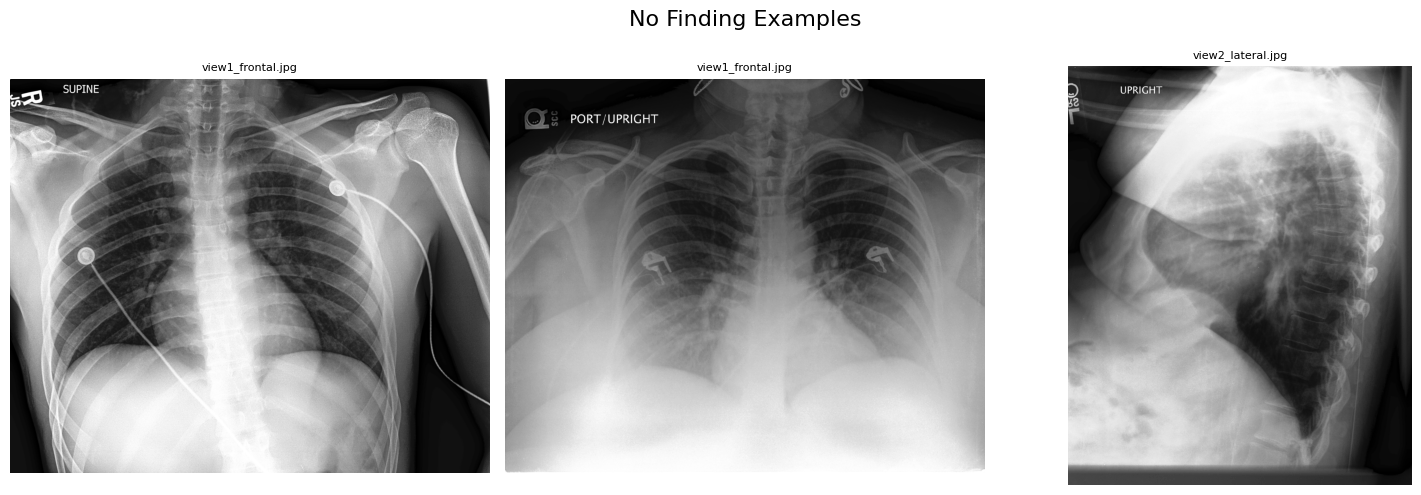

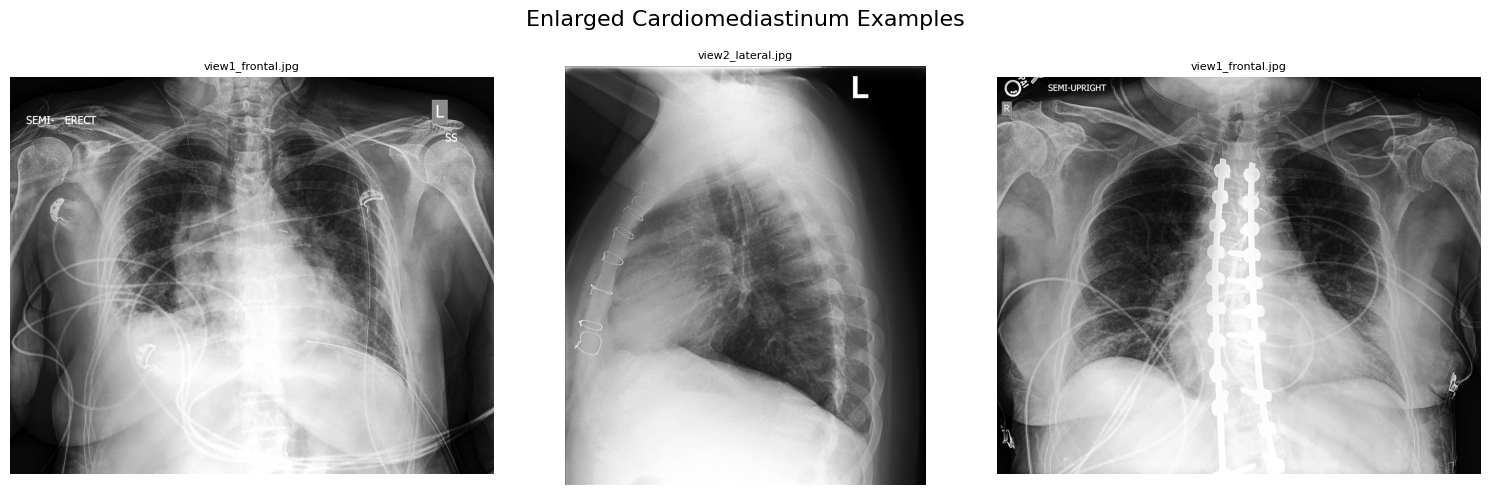

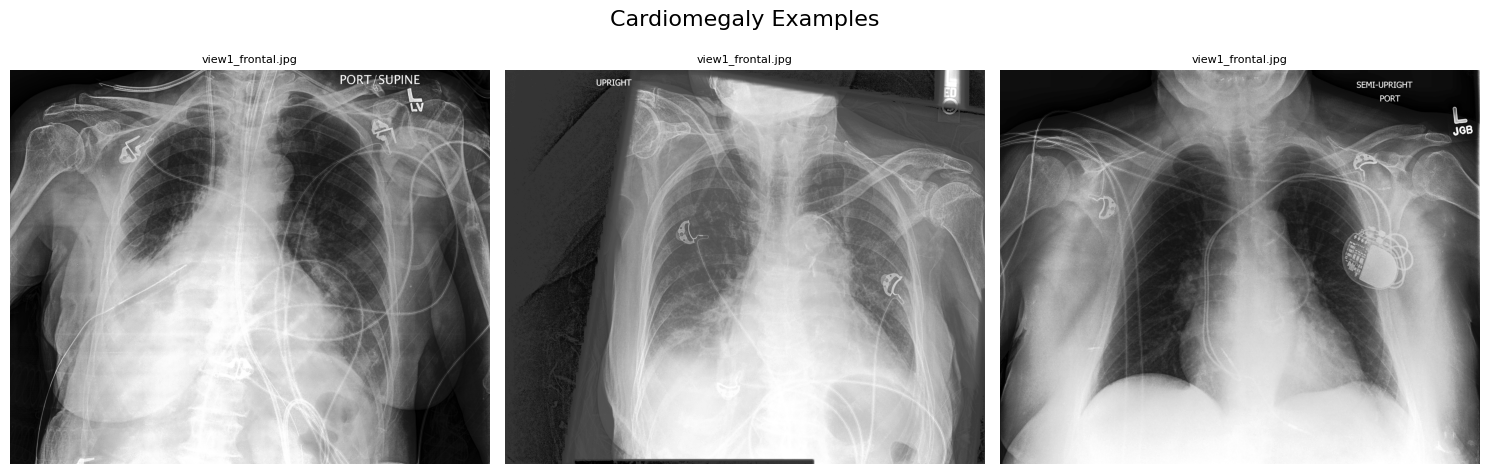

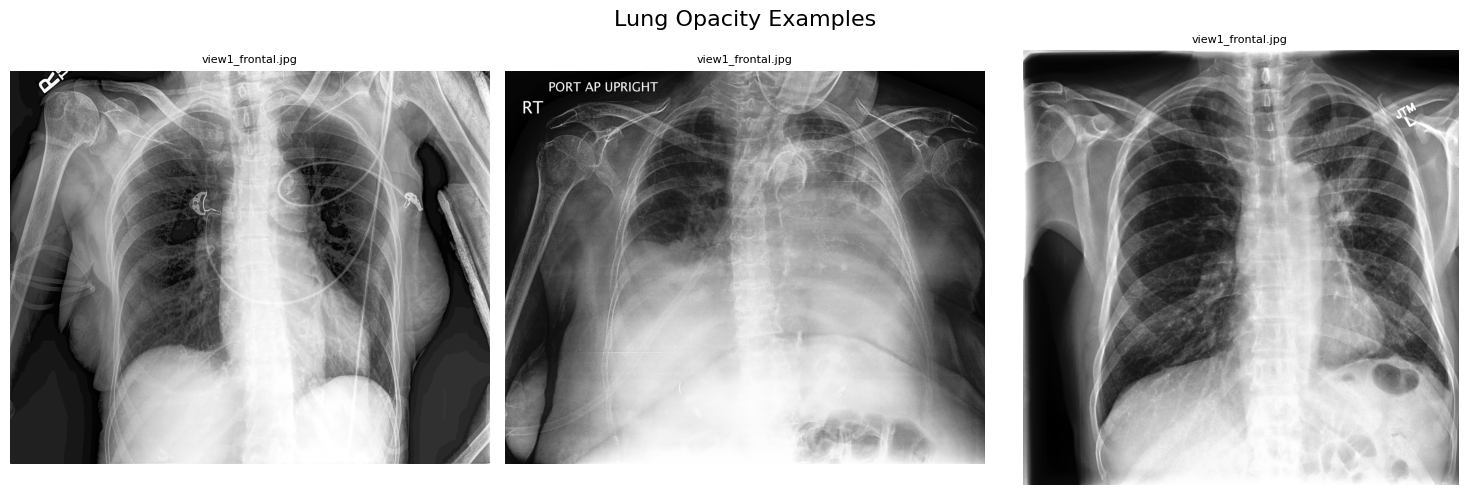

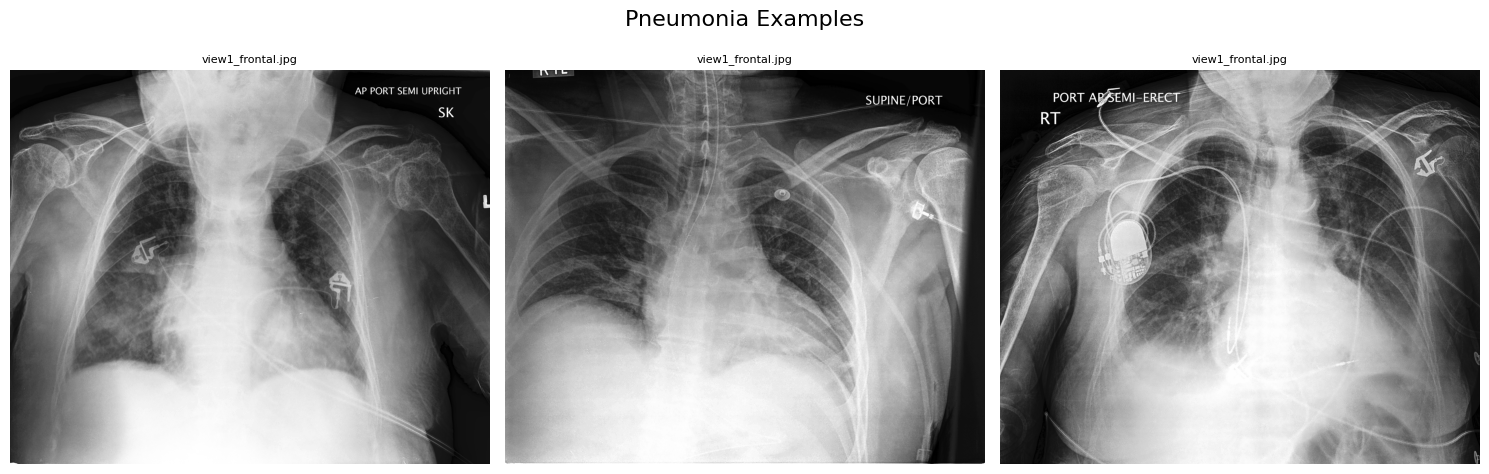

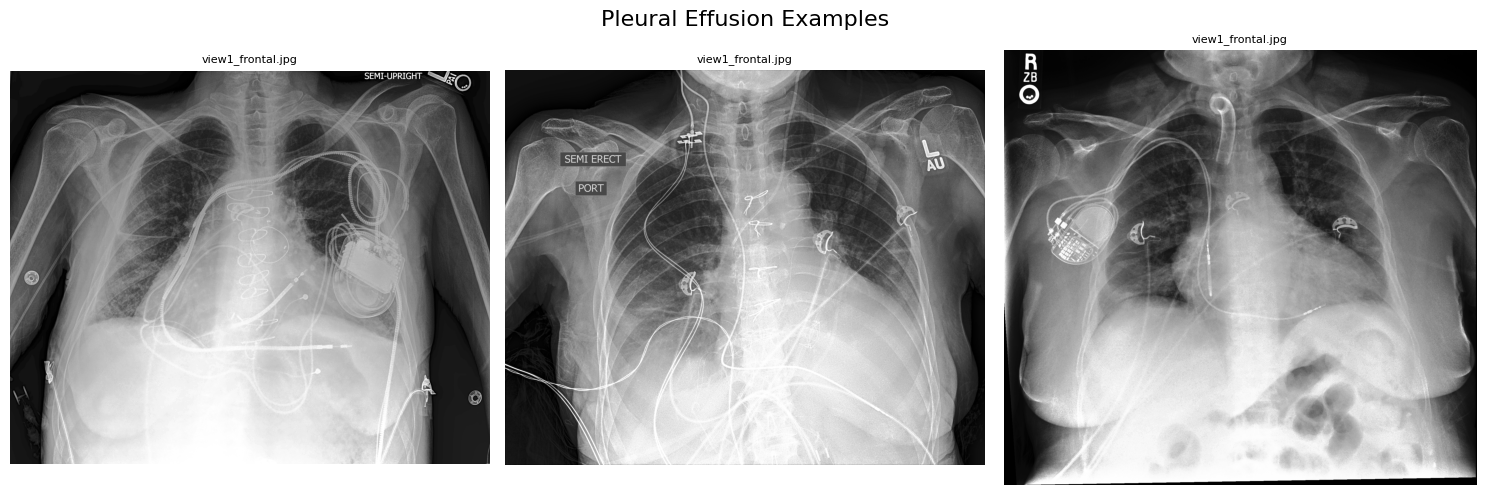

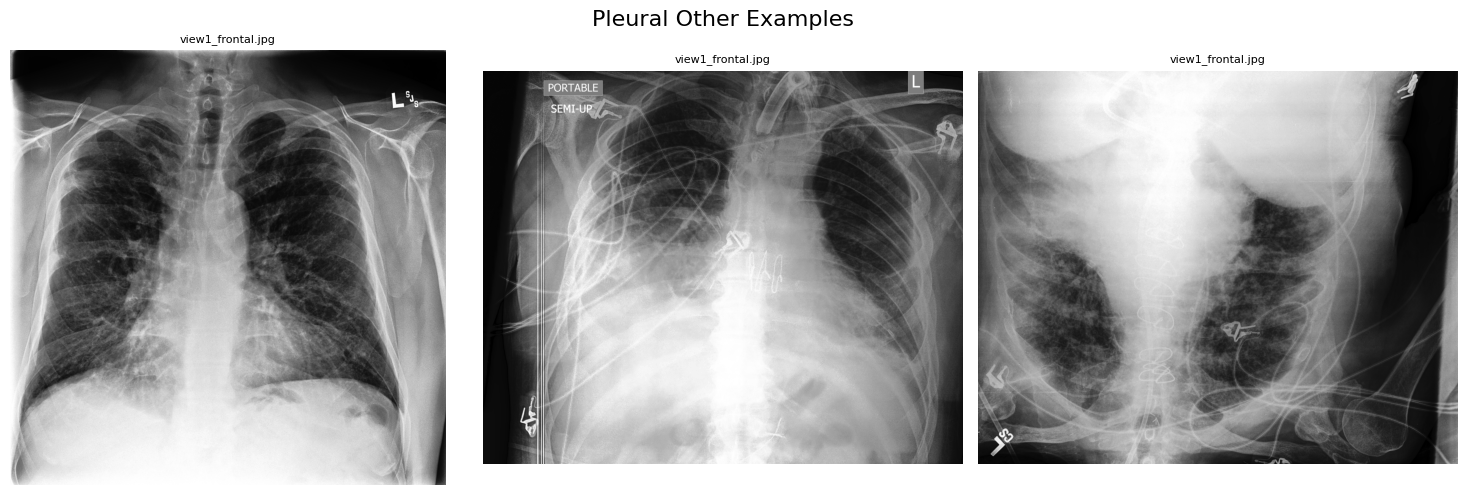

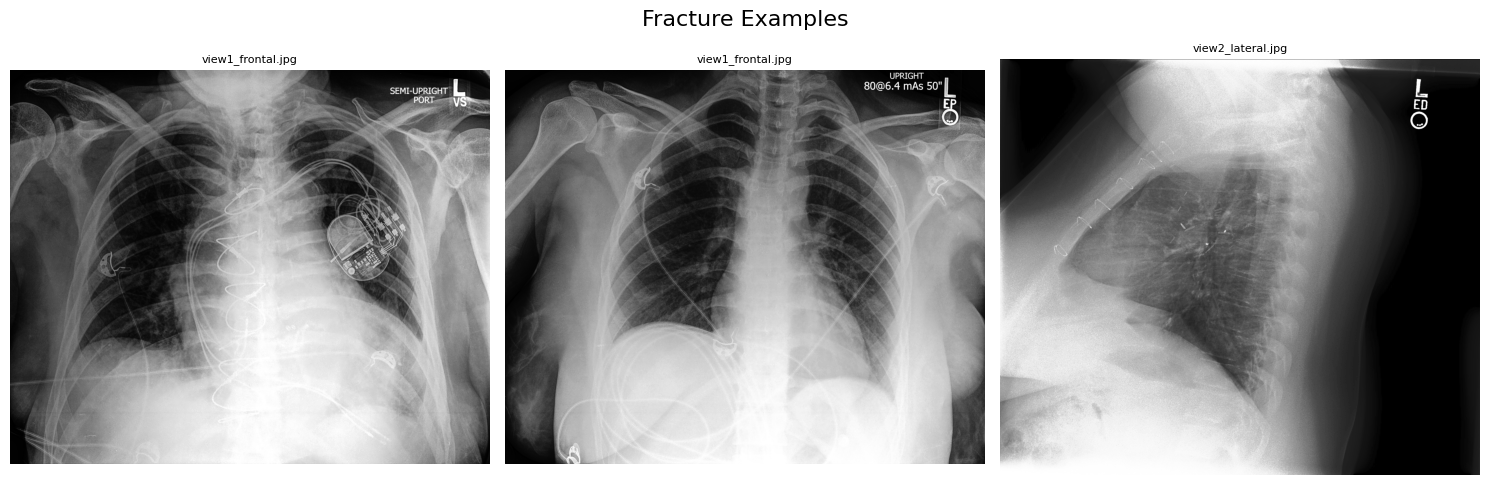

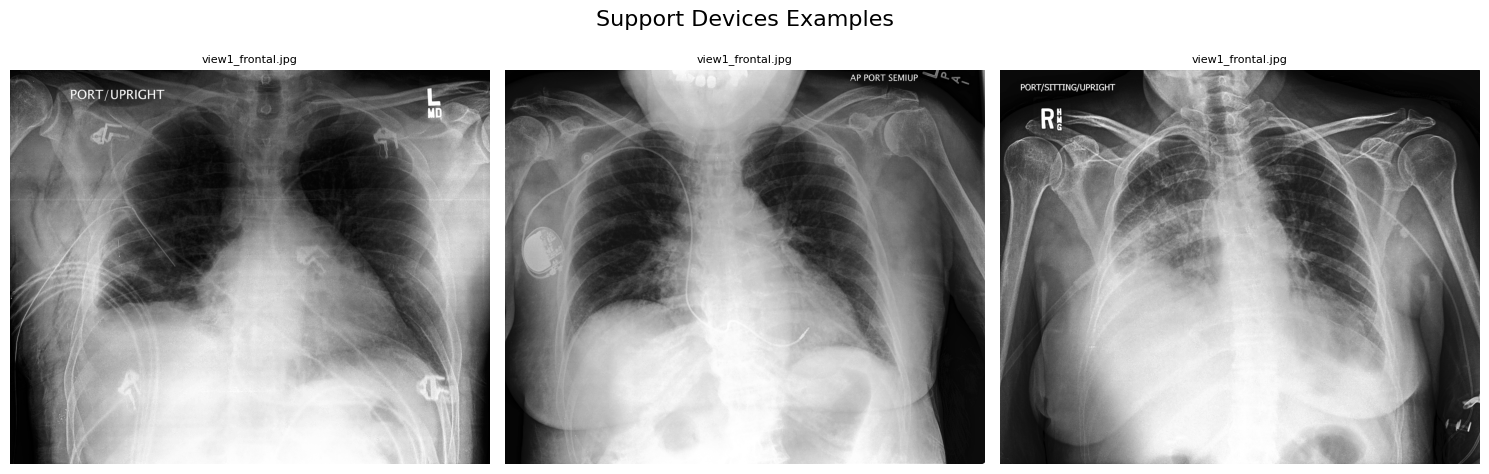

In [ ]:
import matplotlib.pyplot as plt
from PIL import Image
import pandas as pd
import os

# Number of images per category
n = 3 

label_cols = [
    "No Finding", "Enlarged Cardiomediastinum", "Cardiomegaly", "Lung Opacity",
    "Pneumonia", "Pleural Effusion", "Pleural Other", "Fracture", "Support Devices"
]

image_base_path = "/groups/CS156b/data/" 


for label in label_cols:
    positive_rows = df[df[label] == 1.0]

    if not positive_rows.empty:
        sample_rows = positive_rows.sample(n=min(n, len(positive_rows)), random_state=42)

        fig, axs = plt.subplots(1, len(sample_rows), figsize=(15, 5))
        fig.suptitle(f"{label} Examples", fontsize=16)

        for i, (_, row) in enumerate(sample_rows.iterrows()):
            image_path = os.path.join(image_base_path, row["Path"])
            try:
                img = Image.open(image_path)
                axs[i].imshow(img, cmap="gray")
                axs[i].axis("off")
                axs[i].set_title(f"{os.path.basename(row['Path'])}", fontsize=8)
            except FileNotFoundError:
                axs[i].set_visible(False)
                print(f"File not found: {image_path}")

        plt.tight_layout()
        plt.show()
    else:
        print(f"No positive examples for: {label}")


In [ ]:
label_col = 'Lung Opacity' #category for pseudo labels 

# Drop rows with no features
df_features = df.dropna(subset=['feature1', 'feature2', ...])  # replace with your actual features

# Separate known and unknown labels
known = df_features[df_features[label_col].notna()]
unknown = df_features[df_features[label_col].isna()]

# Prepare feature and label arrays
X_known = known[feature_cols].values
y_known = known[label_col].values

X_unknown = unknown[feature_cols].values

# Train a model on the known labels
model = LogisticRegression(max_iter=1000)
model.fit(X_known, y_known)

# Predict pseudo-labels for the unknowns
pseudo_labels = model.predict(X_unknown)
pseudo_probs = model.predict_proba(X_unknown).max(axis=1)

# Filter only high-confidence pseudo-labels (e.g., > 0.9)
confidence_threshold = 0.9
confident_idx = pseudo_probs > confidence_threshold

X_pseudo = X_unknown[confident_idx]
y_pseudo = pseudo_labels[confident_idx]

# Combine real and pseudo data
X_combined = np.vstack([X_known, X_pseudo])
y_combined = np.concatenate([y_known, y_pseudo])

# Retrain on combined data
final_model = LogisticRegression(max_iter=1000)
final_model.fit(X_combined, y_combined)

In [7]:
label_cols = [
    'No Finding', 'Enlarged Cardiomediastinum', 'Cardiomegaly', 'Lung Opacity',
    'Pneumonia', 'Pleural Effusion', 'Pleural Other', 'Fracture', 'Support Devices'
]

# Create a new DataFrame with NaNs replaced by 0 in label columns
df_zero_filled = df.copy()
df_zero_filled[label_cols] = df_zero_filled[label_cols].fillna(0)
print(df_zero_filled.head())


   Unnamed: 0.1  Unnamed: 0                                     Path     Sex  \
0             0           0  train/pid50512/study1/view1_frontal.jpg  Female   
1             1           1  train/pid21580/study2/view1_frontal.jpg  Female   
2             2           2  train/pid21580/study1/view1_frontal.jpg  Female   
3             3           3  train/pid21580/study1/view2_lateral.jpg  Female   
4             4           4  train/pid33839/study1/view1_frontal.jpg    Male   

   Age Frontal/Lateral AP/PA  No Finding  Enlarged Cardiomediastinum  \
0   68         Frontal    AP         1.0                         0.0   
1   87         Frontal    AP        -1.0                         0.0   
2   83         Frontal    AP        -1.0                         0.0   
3   83         Lateral   NaN        -1.0                         0.0   
4   41         Frontal    AP        -1.0                         0.0   

   Cardiomegaly  Lung Opacity  Pneumonia  Pleural Effusion  Pleural Other  \
0        